# Sampling Strategy Tutorial using imblearn lib
Reference: https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/plot_sampling_strategy_usage.html#sphx-glr-auto-examples-plot-sampling-strategy-usage-py

In [1]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from imblearn.datasets import make_imbalance

Using TensorFlow backend.


In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

In [3]:
print(__doc__)

def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')

Automatically created module for IPython interactive environment


In [4]:
iris = load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

Information of the original iris data set: 
 Counter({0: 50, 1: 50, 2: 50})
Information of the iris data set after making it imbalanced using a dict: 
 sampling_strategy={0: 10, 1: 20, 2: 47} 
 y: Counter({2: 47, 1: 20, 0: 10})


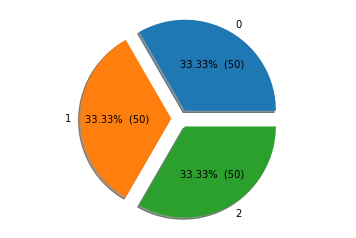

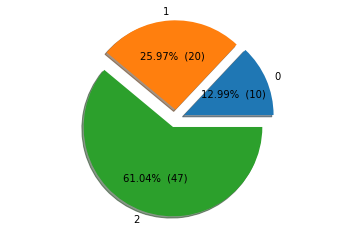

In [8]:
print('Information of the original iris data set: \n {}'.format(
    Counter(iris.target)))
plot_pie(iris.target)

sampling_strategy = {0: 10, 1: 20, 2: 47}
X, y = make_imbalance(iris.data, iris.target,
                      sampling_strategy=sampling_strategy)

print('Information of the iris data set after making it'
      ' imbalanced using a dict: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y)))
plot_pie(y)

# Using ```sampling_strategy``` in resampling algorithms

In [9]:
# select only 2 classes since the ratio make sense in this case
binary_mask = np.bitwise_or(y == 0, y == 2)
binary_y = y[binary_mask]
binary_X = X[binary_mask]

In [12]:
print(binary_X.shape)
print(binary_y.shape)

(57, 4)
(57,)


# Under Sampling with sampling_strategy=0.8
- sampling_strategy = len(class minority) / len(class majority)= 0.8

Information of the iris data set after making it balanced using a float and an under-sampling method: 
 sampling_strategy=0.8 
 y: Counter({2: 12, 0: 10})


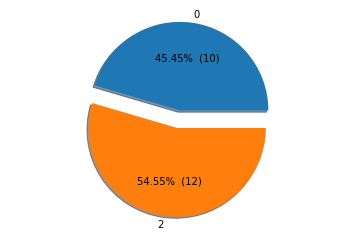

In [18]:
sampling_strategy = 0.8

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)

X_res, y_res = rus.fit_resample(binary_X, binary_y)

print('Information of the iris data set after making it '
      'balanced using a float and an under-sampling method: \n '
      'sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

# Oversampling
- sampling_strategy = len(class minority) / len(class majority)= 0.8

Information of the iris data set after making it balanced using a float and an over-sampling method: 
 sampling_strategy=0.8 
 y: Counter({2: 47, 0: 37})


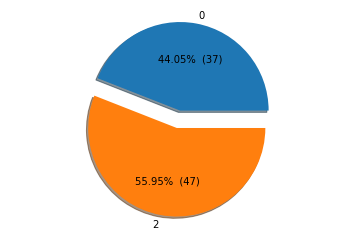

In [20]:
ros = RandomOverSampler(sampling_strategy=sampling_strategy)

X_res, y_res = ros.fit_resample(binary_X, binary_y)

print('Information of the iris data set after making it '
      'balanced using a float and an over-sampling method: \n '
      'sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

# Multi-Class
- ```sampling_strategy``` is a ```str```

Information of the iris data set after making it balanced by under-sampling: 
 sampling_strategy=not minority 
 y: Counter({0: 10, 1: 10, 2: 10})


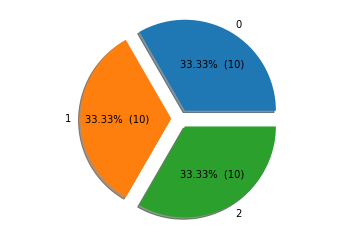

In [24]:
sampling_strategy = 'not minority'

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

print('Information of the iris data set after making it '
      'balanced by under-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)


Information of the iris data set after making it balanced by under-sampling: 
 sampling_strategy=not majority 
 y: Counter({2: 47, 0: 10, 1: 10})


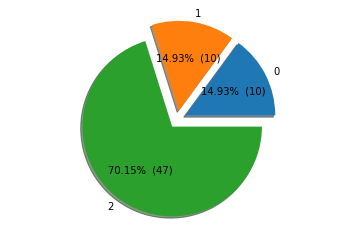

In [25]:
sampling_strategy = 'not majority'

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

print('Information of the iris data set after making it '
      'balanced by under-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

### Over Sampling

Information of the iris data set after making it balanced by over-sampling: 
 sampling_strategy=not majority 
 y: Counter({0: 47, 1: 47, 2: 47})


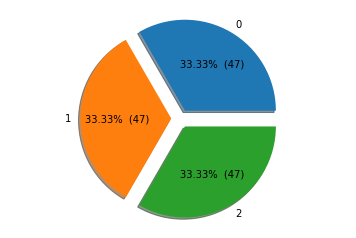

In [27]:
sampling_strategy = 'not majority'

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
print('Information of the iris data set after making it '
      'balanced by over-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

Information of the iris data set after making it balanced by over-sampling: 
 sampling_strategy=not minority 
 y: Counter({1: 47, 2: 47, 0: 10})


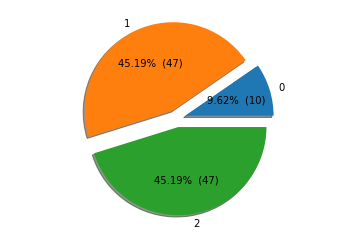

In [28]:
sampling_strategy = 'not minority'

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
print('Information of the iris data set after making it '
      'balanced by over-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

# ```sampling_strategy``` has a ```dict```

Information of the iris data set after making it balanced by under-sampling: 
 sampling_strategy={0: 10, 1: 15, 2: 20} 
 y: Counter({2: 20, 1: 15, 0: 10})


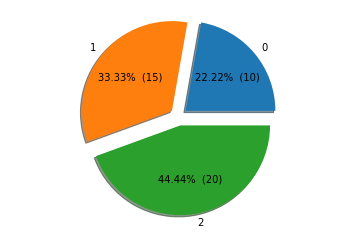

In [29]:
sampling_strategy = {0: 10, 1:15, 2:20}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
print('Information of the iris data set after making it '
      'balanced by under-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

Information of the iris data set after making it balanced by over-sampling: 
 sampling_strategy={0: 25, 1: 35, 2: 47} 
 y: Counter({2: 47, 1: 35, 0: 25})


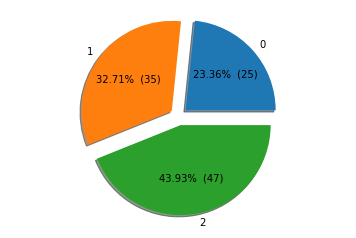

In [34]:
sampling_strategy = {0: 25, 1: 35, 2: 47}

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
print('Information of the iris data set after making it '
      'balanced by over-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)